# Grade: /100 Mark(s)

# Assignment 02: Maximum Likelihood


### Maximum Likelihood

The exponential distribution https://en.wikipedia.org/wiki/Exponential_distribution is a continuous probability distribution often used to predict time when an event might ocurr, for instance Earthquake. 

If we know $y$ is influenced by feature $x$, then we can use the maximum likelihood principle to develop a regression model that estimates the mean of $Y$ given $X=x$.

In [1]:
# Packages for this assignment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

### Question 1: /10 Marks

The negative log likelihood for a exponential random variable is

$$\ell(\lambda; \mathbf{y}) = -\sum_{i=1}^N\Bigg(\ln(\lambda) - \lambda y_i \Bigg)$$

Here, $\mathbf{y}=(y_i) \in \mathbb{R^N}$ is a vector  and $\lambda$ is a scalar value.

Define a function called `exponentialNegLogLikelihood` that takes a vector  $\mathbf{y}$ and a parameter $\lambda$ and returns the negative log likelihood.

Test your function by calling it with `lamb = 2` and `y = np.array([1, 4, 6, 0])`.

Test your function by calling it with `lamb = np.array([1, 0.5, 2, 5])` and  `y = np.array([1.5, 2.1, 3.4, 0])`.

Answer in markdown:

* What happens when you set an element of lamb to 0 or a negative number. Why?

In [2]:
def exponentialNegLogLikelihood(lamb, y):
    """
    Calculate negative log likelihood for exponential random variable
    """    
    res = -1 * np.sum(np.log(lamb) - lamb * y)
    return res


lamb = 2
y = np.array([1, 4, 6, 0])
res_1  = exponentialNegLogLikelihood(lamb=lamb, y=y)
print("Case 1: {}".format(res_1))


lamb = np.array([1, 0.5, 2, 5])
y = np.array([1.5, 2.1, 3.4, 0])
res_2  = exponentialNegLogLikelihood(lamb=lamb, y=y)
print("Case 2: {}".format(res_2))

Case 1: 19.227411277760222
Case 2: 7.740562087565899


What happens when you set an element of lamb to 0 or a negative number. Why?

When I set lambda to 0 and negative values, I faced two below errors:

1) RuntimeWarning: divide by zero encountered in log
2) RuntimeWarning: invalid value encountered in log

Log(0) and Log(negative number) are not definded. The domain of log is positive real numbers.

---

### Question 2: /15 Marks

Write a function called `exponentialRegressionNegLogLikelihood` that takes as arguments a vector $\mathbf{y}$ , a design matrix $\mathbf{X}$ of features, and a vector $\mathbf{\beta}$ of parameters. The function should return the negative log likelihood of this dataset, assuming that each element of  $\mathbf{y}$ is independent, and exponentially distributed with $\lambda=\exp(-\mathbf{X}\beta)$.

Test your function by calling it with 
* `b = np.array([1, 3])`
* `X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T`
* `y = np.array([0, 2.5, 10])`

In [3]:
def exponentialRegressionNegLogLikelihood(b, X, y):
    # obtain lambda by dataset
    lamb = np.exp(-1 * np.dot(X, b.T))

    # negative log likihood of the dataset
    dataset_negative_log_likelihood = exponentialNegLogLikelihood(lamb=lamb, y=y)
    
    return dataset_negative_log_likelihood

b = np.array([1, 3])
X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T
y = np.array([0, 2.5, 10])

res_3 = exponentialRegressionNegLogLikelihood(b=b, X=X, y=y)
print('Negative log likihood of the dataset: {}'.format(res_3))

Negative log likihood of the dataset: 26.60556862451103


### Question 3: /10 Marks

a) In `exponentialRegressionNegLogLikelihood`, what problem can happen if we assume that $\lambda = \mathbf{X}\beta$?. Answer in the below markdown.


b) What property of the exponential distribution is guaranteed when we assume that $\lambda$ has the form of $\exp(-\mathbf{X}\beta)$? Answer in the below markdown. 

No more than 2 lines for each answer.

Answer 1) If we assume $\lambda = \mathbf{X}\beta$, the lambda cab become zero or negative and in negative log likelihood, there is a Log function. Log() is not defined on zero and negative values.



Answer 2) When we used $\exp(-\mathbf{X}\beta)$, the result lambda will be a positive real number. Also, obtained Lambda has exponential behaviour with change of X.

### Question 4: /2.5 Marks

Define a function called `Prediction` whose arguments are a vector of coefficents $\beta$ and a design matrix $\mathbf{X}$, and its outputs are predictions of the form $\widehat{\mathbf{y}} = \exp(\mathbf{X}\beta)$. 

Test your function by calling it with 
* `b = np.array([1, 3])`
* `X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T`

In [4]:
def Prediction(b, X):
    
    y_hat = np.exp(np.dot(X, b.T))
    return y_hat

b = np.array([1, 3])
X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T
print(Prediction(b=b, X=X))

[ 2980.95798704 66171.16016838  1808.04241446]


### Question 5: /15 Marks

Define a function called `Model_fit` which accepts as its first argument a design matrix $\mathbf{X}$ and as its second argument a vector of $\mathbf{y}$. Its output should be the maximum likelihood estimates for the coefficients of exponential regression of $\mathbf{y}$ onto $\mathbf{X}$.

Test your function by calling it with 
* `X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T`
* `y = np.array([0, 2.5, 10])`

Write the estimated coefficient $b$.

In [5]:
def Model_fit(X, y):
    
    initial_b = np.zeros(shape=X.shape[1])
    result = minimize(fun=exponentialRegressionNegLogLikelihood, x0=initial_b, args=(X, y), method="powell")

    return result.x

X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T
y = np.array([0, 2.5, 10])

find_b = Model_fit(X=X, y=y)

print('Find coefficients: {}'.format(find_b))

Find coefficients: [ 1.17119176 -0.72067184]


### Question 6: /2.5 Marks

Define a function called `Squared_residual` which accepts as its first argument a design matrix $\mathbf{X}$, its second argument a vector of $\mathbf{y}$ and its third argument a vector $\beta$. Its output should be squared residual of the exponential regression model. This residual is defined as 

$$
\text{squared-residual} = \dfrac{1}{n}\sum_i (y_i-\hat{y}_i)^2
$$

Test your function by calling it with 
* `X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T`
* `y = np.array([2980, 66171, 1808])`
* `b = np.array([1, 3])`


In [6]:
def Squared_residual(X,y,b):
    n = X.shape[0]
    return (1/n) * np.sum((y -  Prediction(b=b, X=X)) ** 2)

X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T
y = np.array([2980, 66171, 1808])
b = np.array([1, 3])

res = Squared_residual(X=X,y=y,b=b)
print('Squared residual: {}'.format(res))

Squared residual: 0.315064022352556


### Question 7: /20 Mark(s)

Use the data `exponential_regression.csv`, where $y$ represents time units to fit a exponential regression using the functions that you already have created. 

* What are the estimated coefficients?
* Plot a scatterplot of the data that includes the model prediction over $x \in [-2.14, 2.14]$. Do not forget to include a graph title.
* Report the Squared residual in the plot

Coeficient b: [ 0.07120564 -1.75117875]
Square residual: 3.368650311941889


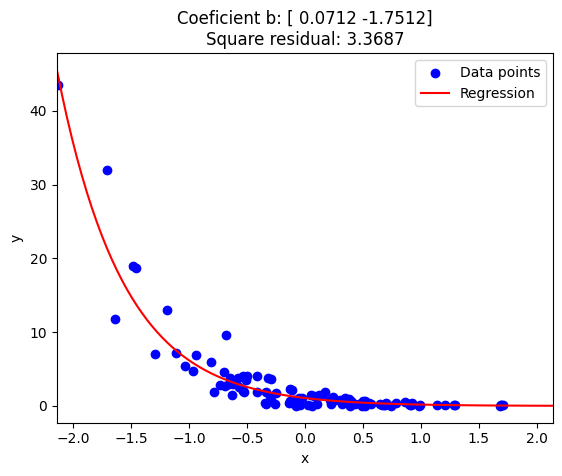

In [7]:
# code

# read data
df = pd.read_csv(filepath_or_buffer='exponential_regression.csv', delimiter=';')

# add one to X
x_col = df['x'].to_numpy().reshape((-1, 1))
augmented_x = np.concatenate((np.ones_like(x_col), x_col), axis=1)

# find coeficients
coeficients_b = Model_fit(X=augmented_x, y=df['y'])
print('Coeficient b: {}'.format(coeficients_b))

# calculate square residual
square_res = Squared_residual(X=augmented_x,y=df['y'], b=coeficients_b)
print('Square residual: {}'.format(square_res))

# generate points for regression curve
X_fig = np.linspace(start=-2.14, stop=2.14, num=100)
X_fig_aug = X_fig.reshape((-1, 1))
X_fig_aug = np.concatenate((np.ones_like(X_fig_aug), X_fig_aug), axis=1)
y_fig = Prediction(b=coeficients_b, X=X_fig_aug)

# plot points and regression curve
plt.scatter(df['x'].to_numpy(), df['y'].to_numpy(), c='b', label='Data points')
plt.plot(X_fig, y_fig, c='r', label='Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-2.14, 2.14)
plt.legend()
plt.title('Coeficient b: {}\nSquare residual: {}'.format(coeficients_b.round(4), square_res.round(4)))
plt.show()


### Question 8:  /10 Marks

Fit a linear regression (ordinary least squares) to the data, and obtain parameter estimates and and plot the predictions over the same range. Report the Squared residual in the plot


Intercept: 2.8457714122172195, Coeficient: [-5.11409159]
Square residual: 20.804808321384726


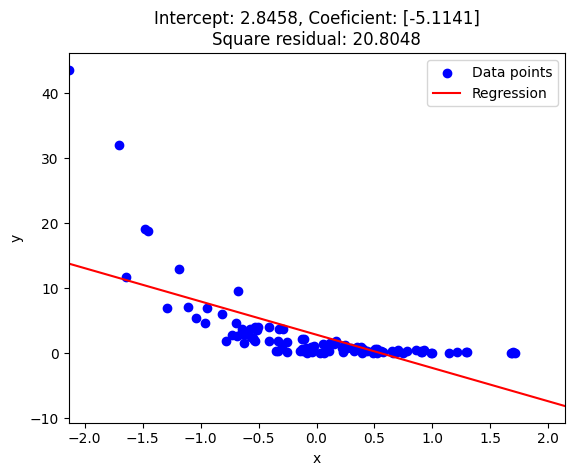

In [8]:
def Squared_residual_linear_regression(X,y, regressor):
    """
    Square residual for linear regression
    """
    n = X.shape[0]
    return (1/n) * np.sum((y -  regressor.predict(X)) ** 2)

# read data
df = pd.read_csv(filepath_or_buffer='exponential_regression.csv', delimiter=';')

# 
x_col = df['x'].to_numpy().reshape((-1, 1))

# Do linear regression
reg = LinearRegression().fit(X=x_col, y=df['y'])
intercept_b = reg.intercept_
coeficients_b = reg.coef_
print('Intercept: {}, Coeficient: {}'.format(intercept_b, coeficients_b))

# calculate square residual
square_res = Squared_residual_linear_regression(X=x_col,y=df['y'], regressor=reg)
print('Square residual: {}'.format(square_res))

# generate points for regression curve
X_fig = np.linspace(start=-2.14, stop=2.14, num=100)
X_fig_reshape = X_fig.reshape((-1, 1))
y_fig = reg.predict(X_fig_reshape)

# plot points and regression curve
plt.scatter(df['x'].to_numpy(), df['y'].to_numpy(), c='b', label='Data points')
plt.plot(X_fig, y_fig, c='r', label='Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-2.14, 2.14)
plt.legend()
plt.title('Intercept: {}, Coeficient: {}\nSquare residual: {}'.format(intercept_b.round(4), coeficients_b.round(4), square_res.round(4)))
plt.show()

### Question 9:  /10 Marks

Fit a linear regression (ordinary least squares) to the data with a square term, and obtain parameter estimates and and plot the predictions over the same range. Report the Squared residual in the plot.

Note that in this case the matrix X should look like 

$X =[[1,x_1,x_1^2],[1,x_2,x_2^2],...]$


Intercept: 0.21741312700662974, Coeficient: [-4.96170882  4.34031982]
Square residual: 7.529391721951649


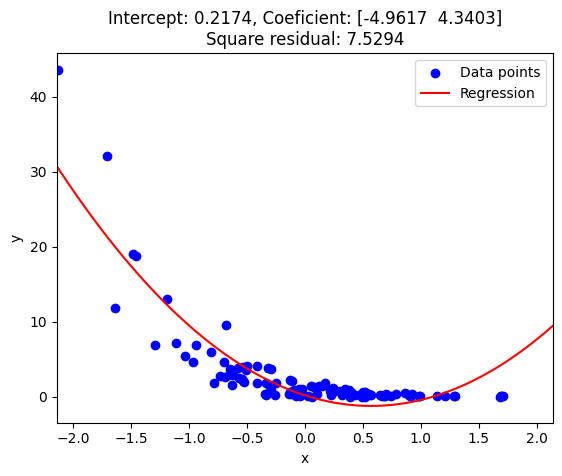

In [9]:
# read data
df = pd.read_csv(filepath_or_buffer='exponential_regression.csv', delimiter=';')

# add x^2
x_col = df['x'].to_numpy().reshape((-1, 1))
augmented_x = np.concatenate((x_col, x_col**2), axis=1)

# Do linear regression
reg = LinearRegression().fit(X=augmented_x, y=df['y'])
intercept_b = reg.intercept_
coeficients_b = reg.coef_
print('Intercept: {}, Coeficient: {}'.format(intercept_b, coeficients_b))

# calculate square residual
square_res = Squared_residual_linear_regression(X=augmented_x, y=df['y'], regressor=reg)
print('Square residual: {}'.format(square_res))

# generate points for regression curve
X_fig = np.linspace(start=-2.14, stop=2.14, num=100)
X_fig_aug = X_fig.reshape((-1, 1))
X_fig_aug = np.concatenate((X_fig_aug, X_fig_aug**2), axis=1)
y_fig = reg.predict(X_fig_aug)

# plot points and regression curve
plt.scatter(df['x'].to_numpy(), df['y'].to_numpy(), c='b', label='Data points')
plt.plot(X_fig, y_fig, c='r', label='Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-2.14, 2.14)
plt.legend()
plt.title('Intercept: {}, Coeficient: {}\nSquare residual: {}'.format(intercept_b.round(4), coeficients_b.round(4), square_res.round(4)))
plt.show()

### Question 10: /5 Mark(s)

Between this three models which one would you select? What is the major problem with predictions from the other two models? Remember that in this case $y$ is measured in time units.

Answer:
Among the three model, the first one (negative log likelihood) is the best one. It has the smallest square residual, which shows it is better.
Also, if we look at the plotted data and regressed curves, we see the second one (linear) is completely off and can not model the data that is highly nonlinear. The third one (linear regression with x^2 term) is better that the naive linear; however, at the end of x limit, it goes up. For this reasons, the first one (negative log likelihood) is the best.


### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.